# Descriptive Statistics & Distribution

**Goals**  
- Describe a variable using center, spread, and shape  
- Compute descriptive statistics: mean, median, variance, standard deviation  
- Understand distributions 
- Connect probability to data-generating processes
- Randomness  
- The Law of Large Numbers

In [44]:
### headers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data and Variables

When describing data, make sure you cover center, spread, and shape.

In [45]:
tips = sns.load_dataset('tips')
tips                      ### size means number of ppl in the party

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [46]:
tips.shape       ### a dataframe has shape, which is a tuple

(244, 7)

### Population vs sample
Population is the full group we care about (e.g., “all lunch bills at the restaurant this year”), whereas sample is the subset we actually measured (e.g., the 244 rows in the tips dataset). We only ever see the sample, but we talk like we know the population.
  
### Variable vs Observation
Each **row** in the dataframe/dataset is an observation (e.g., one restaurant bill), whereas **columns** are variables (e.g., total_bill, tip, smoker, time (Dinner/Lunch), etc.).

- **Quantitative** variable: e.g., total_bill (numeric, measured)
- **Categorical** variable: time (Lunch vs Dinner), smoker (Yes/No)

### Distribution

A **distribution** shows how often different values occur. For numeric data:
- Are most bills around \$10? \$20? \$50?
- Are there a few very large bills? (outliers)

For categorical data:
- How common is “Dinner” vs “Lunch”?


### Descriptive Statistics

`df.describe()` gives you the descriptive statistics of the dataset.

In [47]:
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

Key summaries for a numeric variable:

- Mean (average)  
- Median (middle value)  
- Standard deviation (typical distance from the mean)  
- IQR (middle 50% range)

Let's compute them for `total_bill`.


### Center: mean vs median



In [48]:
col = tips['total_bill']

summary = pd.DataFrame({
    'mean': [col.mean()],
    'median': [col.median()],
    'std (SD)': [col.std()],
    'IQR': [col.quantile(0.75) - col.quantile(0.25)]
})
summary

mean  median  std (SD)    IQR
0  19.785943  17.795  8.902412  10.78

### Visualizing One Variable

We'll use:
- Histogram (counts or density)
- Boxplot (median, quartiles, outliers)
- KDE / density curve (smoothed shape)

Interpretation checklist: **center / spread / shape / outliers**.


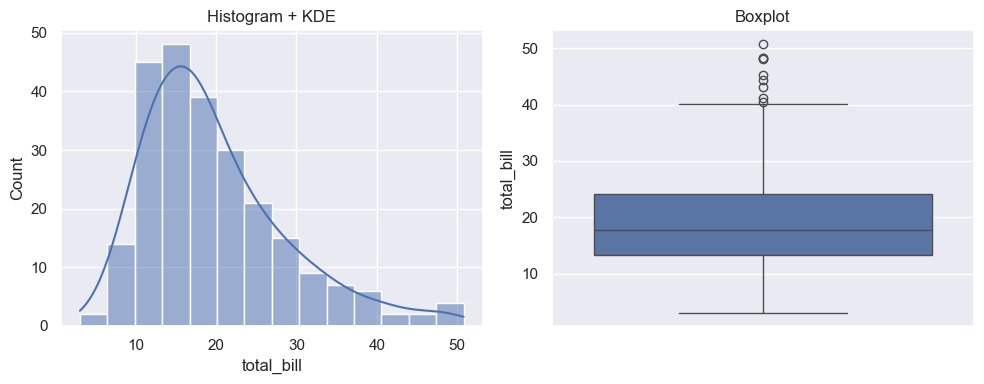

In [49]:
sns.set_theme()

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(tips, x='total_bill', kde=True, ax=axes[0])
axes[0].set_title('Histogram + KDE')

sns.boxplot(y=tips['total_bill'], ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

## Distributions



### Normal Distribution

A normal distribution—also called a Gaussian distribution—is a symmetrical, bell-shaped probability distribution centered on the mean, where most data points cluster around that mean with frequencies tapering off equally toward both extremes.

Key Properties: 

- Defined by its mean (μ) and standard deviation (σ).
- The `mean`, `median`, and `mode` are equal and located at the center.​
- Symmetrical: the left and right sides are mirror images.
- 68% of data falls within 1 standard deviation, 95% within 2, and 99.7% within 3 standard deviations from the mean (“Empirical Rule”).​
- Frequently models real-world phenomena due to the Central Limit Theorem.

Example Applications:
- Heights of People: Human heights in a given population typically follow a normal distribution—most people are near the average height, with fewer extremely short or tall.​
- IQ Scores: Measured intelligence is designed to follow a normal curve, with an average of 100 and most people close to the average.​
- Measurement Errors: Repeated measurements of something (e.g., lengths, weights) often cluster around the true value, following a normal distribution.​
- Test Scores: Large-scale standardized test results (e.g., SAT, GRE) often approximate a normal distribution after some normalization.

Example        |  Mean (μ)  |  Standard Deviation (σ)  |  What is Measured         
---------------|------------|--------------------------|---------------------------
Adult heights  |  170 cm    |  10 cm                   |  Human height distribution
IQ scores      |  100       |  15                      |  Intelligence             
SAT scores     |  1050      |  200                     |  Standardized tests       

Let us use the `random` module in NumPy to explore. 

In [50]:
from numpy import random
random.seed(42)

x = random.normal(size=(2, 3))
print(type(x))
print(x)

<class 'numpy.ndarray'>
[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]]


Now let's add mean and standard deviation (because this is a normal distribution). Here we are controlling the center and the spread of the distribution. 

In [51]:
### generate a random normal distribution of size 2X3 with mean at 1 and SD of 2

random.seed(42)
x = random.normal(loc=1, scale=2, size=(2, 3))
print(x)

[[1.99342831 0.7234714  2.29537708]
 [4.04605971 0.53169325 0.53172609]]


Time for some visualization. Note that we are using `height` and `aspect` (ratio) to control figure size.

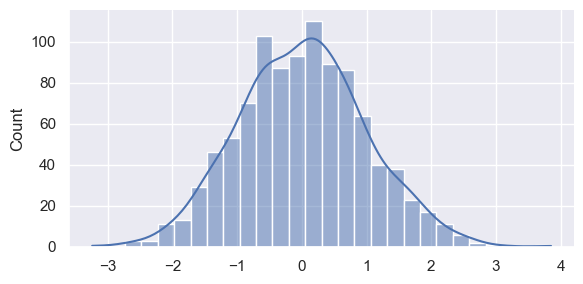

In [52]:
random.seed(42)

np.random.seed(42)
sns.displot(random.normal(size=1000), height=3, aspect=2,kde=True)

A KDE only plot. Note that we are controlling figure size by 

- `plt.figure(figsize)` 
- `dpi`

<Axes: ylabel='Density'>

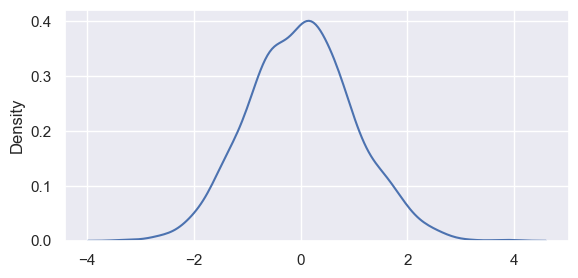

In [53]:
random.seed(42)

np.random.seed(42)

plt.figure(figsize=(6.5, 3))
sns.kdeplot(random.normal(size=1000))

Now let's add `dpi` to control figure size.

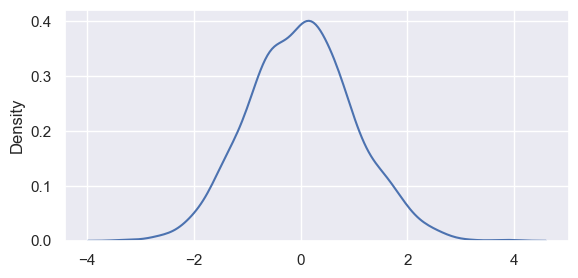

In [54]:
np.random.seed(42)

import matplotlib as mpl
with mpl.rc_context({"figure.dpi": 100}):
    plt.figure(figsize=(6.5, 3))
    sns.kdeplot(random.normal(size=1000))

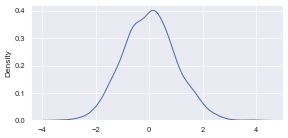

In [55]:
np.random.seed(42)

import matplotlib as mpl
with mpl.rc_context({"figure.dpi": 50}):
    plt.figure(figsize=(6.5, 3))
    sns.kdeplot(random.normal(size=1000))

### Binomial Distribution

A binomial distribution is a discrete probability distribution that models the number of successes in a fixed number of independent trials, where each trial has only two outcomes: “success” or “failure.” Every trial must have the same probability of success. This distribution is fundamental for analyzing repeated yes/no-type experiments (Bernoulli trials) and appears frequently in statistics and data science.

Key Features:
- There are `n` fixed trials.
- Each trial is independent.
- There are only two possible outcomes per trial (success or failure).
- The chance of success `p` is constant for each trial.

For example, flipping a fair coin 10 times and counting the number of heads. Here, each flip is independent, and the probability of heads (success) is 0.5. The distribution of the number of heads follows a binomial distribution with n=10, p=0.5.

In [56]:
# binomial vs normal distributions
random.seed(42)

norm = random.normal(loc=50, scale=5, size=1000)
bino = random.binomial(n=100, p=0.5, size=1000)

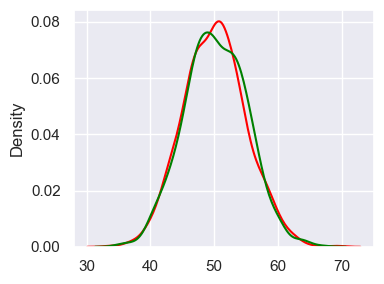

In [57]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.kdeplot(data=norm, label='Normal', color='red')
sns.kdeplot(data=bino, label='Binomial', color='green')
plt.tight_layout()

Visually comparing normal distribution and binomial distribution. 

In [58]:
### test out 1 scaler
random.binomial(n=100, p=0.5, size=1)

array([45])

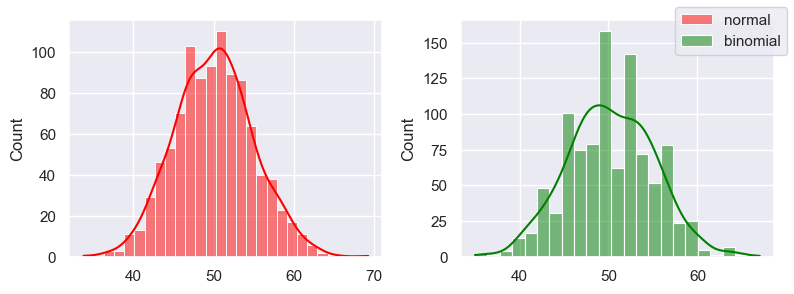

In [59]:
### normal distribution vs binomial
### binomial approximates normal distribution when n is big (np >=5)
### binomial "spikes" because it's integers

random.seed(42)
norm = random.normal(loc=50, scale=5, size=1000)  ### mean=50, SD=5 to match binomial
bino = random.binomial(n=100, p=0.5, size=1000)

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
sns.histplot(norm, label='normal', color='red', ax=ax[0], kde=True)
sns.histplot(bino, label="binomial", color='green', ax=ax[1], kde=True)
fig.legend()
fig.tight_layout()

Coin flipping! (If you count the numbers of heads, it will be a normal distribution)

Number of Heads: 44


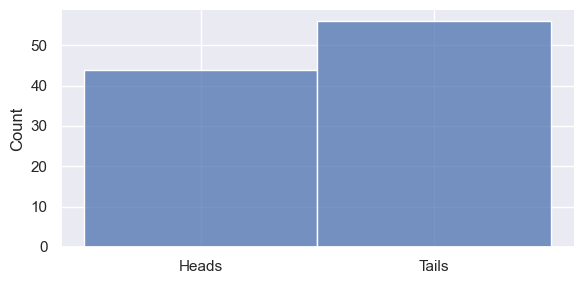

In [60]:
# Define the coin sides
coin = ['Heads', 'Tails']

# Simulate 100 coin flips
random.seed(42)
flips = np.random.choice(coin, size=100)

# Count the number of heads
num_heads = np.count_nonzero(flips == 'Heads')

print("Number of Heads:", num_heads)

sns.displot(flips, height=3, aspect=2, bins=10, kde=False)  

### Uniform Distribution

A uniform distribution is a probability distribution where every outcome within a certain range is equally likely to occur. This means there is no bias—each result has the same probability as any other within the specified set. 

Examples: 
- Rolling a fair six-sided die. Each face (1 through 6) has a 1/6 chance of appearing, so the probability of rolling any particular number is equal.​
- Flipping a fair coin. Heads and tails each have a 50% chance.​



The `numpy.random.uniform()` method draws samples from a **uniform distribution**. Samples are uniformly distributed over the half-open interval ``[low, high)`` (includes low, but excludes high). In other words, any value within the given interval is equally likely to be drawn by `uniform`.

The syntax: 

`random.uniform(low=0.0, high=1.0, size=None)`

In [61]:
random.seed(42)

unif1 = random.uniform()                               ### return 1 number [0, 1)
unif2 = random.uniform(low=1, high=5, size=3)          ### return size=3 numbers [0, 1)
unif3 = random.uniform(low=5, high=10, size=(3, 3))    ### return a 3x3 2D array
unif4 = np.round(random.uniform(low=5, high=10, size=(3, 3)), 2)     ### rounded
unif5 = random.randint(low=5, high=10, size=(3, 3))    ### int

for unif in [ unif1, unif2, unif3, unif4, unif5 ]:
    print(unif, '\n')         

0.3745401188473625 

[4.80285723 3.92797577 3.39463394] 

[[5.7800932  5.7799726  5.29041806]
 [9.33088073 8.00557506 8.54036289]
 [5.10292247 9.84954926 9.1622132 ]] 

[[6.06 5.91 5.92]
 [6.52 7.62 7.16]
 [6.46 8.06 5.7 ]] 

[[8 8 7]
 [8 8 5]
 [7 9 7]] 



#### Best Example: Rolling Die

We eventually flip 1 million times here and see that all 6 numbers and have equal probability distribution.



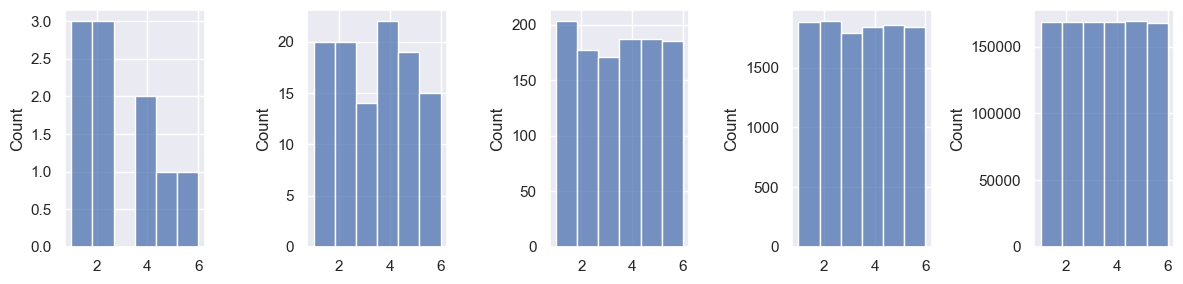

In [62]:
### flip for many times

fig, axes = plt.subplots(1, 5, figsize=(12, 3))

flips = []
for i, ran in enumerate([ 10, 100, 1000, 10000, 1000000 ]):
    for flip in range(ran):                  ### if n > 26, print vertically
        flips.append(random.randint(1, 7))
    # sns.histplot(flips, ax=axes[i])
    sns.histplot(flips, ax=axes[i], bins=6)

plt.tight_layout()

Note that binning can affect the plotting greatly.

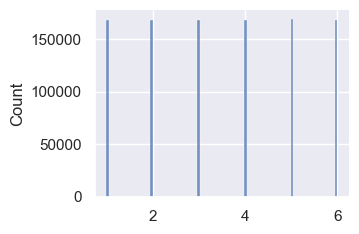

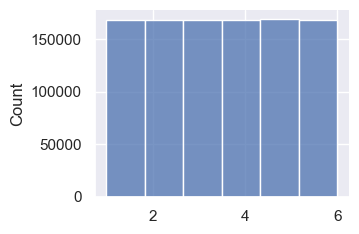

In [63]:
### displot with height and aspect

sns.displot(flips, height=2.5, aspect=3/2)
sns.displot(flips, height=2.5, aspect=3/2, bins=6)

Now use `randint()` to append 1000,000 random ints.

1000000
166666.66666666666


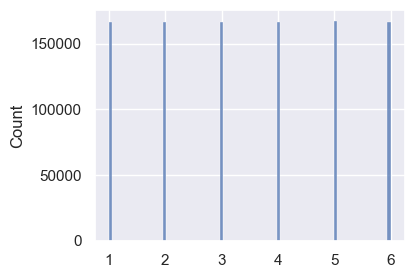

In [64]:
### flip for 1 million times
random.seed(42)

flips2 = []
for flip in range(1000000):
    flips2.append(random.randint(1, 7))

plt.figure(figsize=(4, 3))
sns.histplot(flips2)

print(len(flips2))
print(len(flips2)/6)

Use the `random.uniform()` function to check. Looks uniform to me.

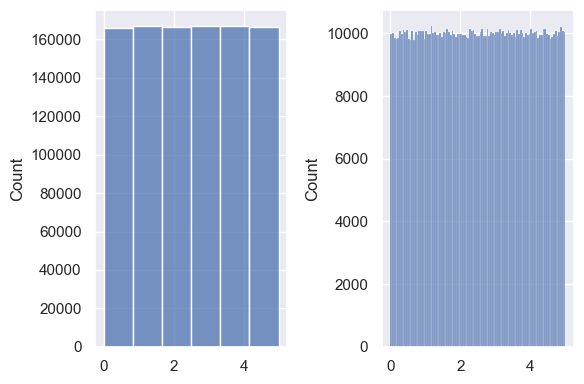

In [65]:
random.seed(42)
unif = random.uniform(0, 5, size=1000000)

fig, ax = plt.subplots(1, 2, figsize=(6, 4))

sns.histplot(data=unif, bins=6, ax=ax[0])
sns.histplot(data=unif, bins=100, ax=ax[1])

plt.tight_layout()

But, when we have smaller `n` and larger `bins`, we see spikes:

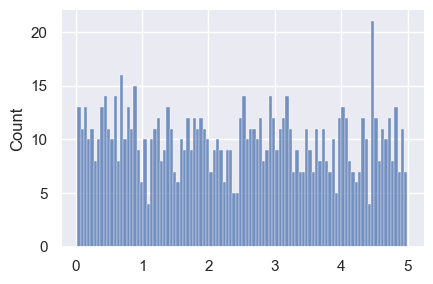

In [66]:
random.seed(42)
unif = random.uniform(0, 5, size=1000)    ### low, high exclusive
sns.displot(data=unif, kind='hist', height=3, aspect=3/2, bins=100)
# sns.displot(unif, kind='kde')
# plt.show()

Using scatter plot to visualize.

<Axes: >

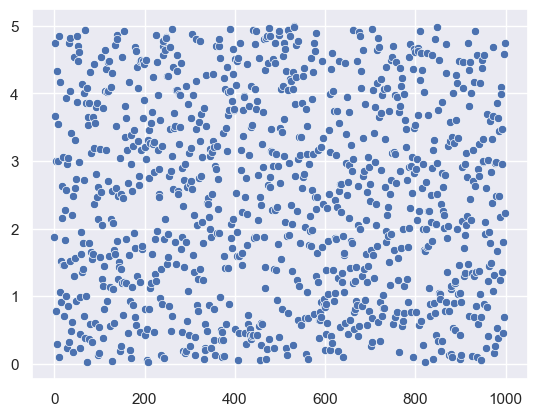

In [67]:
random.seed(42)
unif = random.uniform(0, 5, size=1000)

sns.scatterplot(data=unif)

<Axes: >

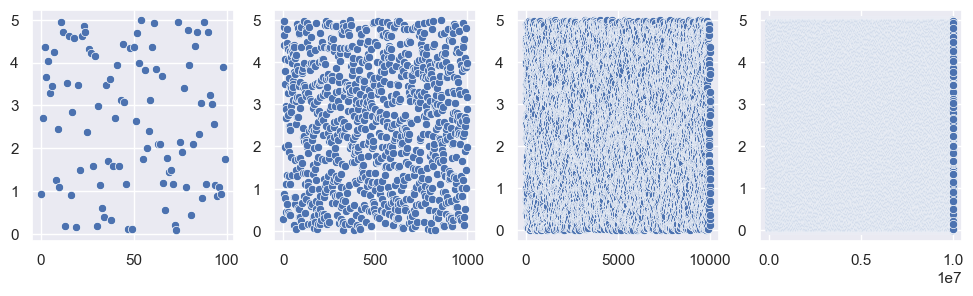

In [68]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3)) ### now we have one fig with two axes

unif1 = random.uniform(0, 5, size=100)
unif2 = random.uniform(0, 5, size=1000)
unif3 = random.uniform(0, 5, size=10000)
unif4 = random.uniform(0, 5, size=10000000)

sns.scatterplot(unif1, ax=axes[0])          
sns.scatterplot(unif2, ax=axes[1])
sns.scatterplot(unif3, ax=axes[2])
sns.scatterplot(unif4, ax=axes[3])


Now, produce a similar plot like the one above for `random.randn()`. Note the binning strategy here.

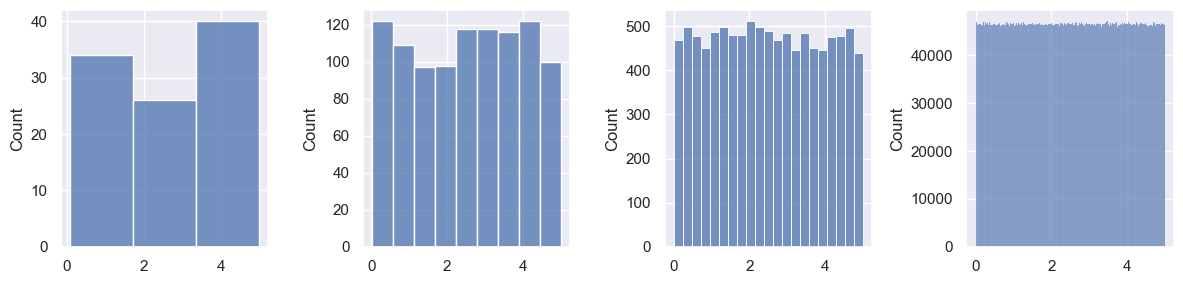

In [69]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3)) ### now we have one fig with two axes

datasets = [ unif1, unif2, unif3, unif4 ]
for i, data in enumerate(datasets):

    q25, q75 = np.percentile(data, [25, 75])            ### bins
    bin_width = 2 * (q75 - q25) * len(data) ** (-1/3)   ### bins
    bins = int((data.max() - data.min()) / bin_width)   ### bins 
    
    sns.histplot(data=data, ax=axes[i], bins=bins)      ### plot

plt.tight_layout()

Visualizing using KDE.

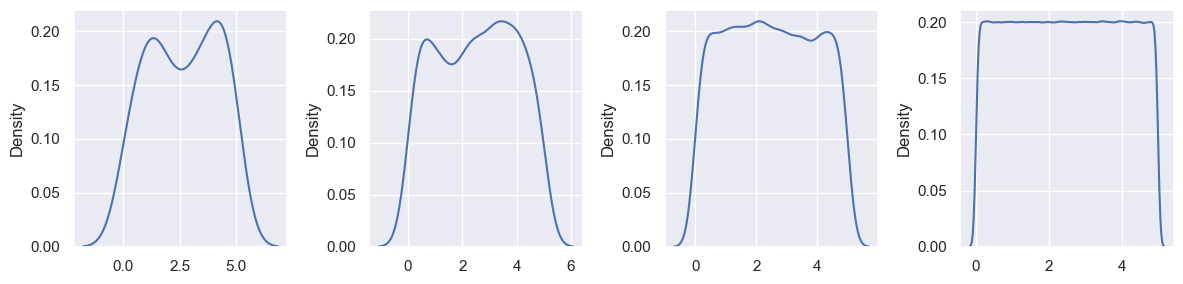

In [70]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3)) ### now we have one fig with two axes

for i, data in enumerate(datasets):

    ### bins ###
    q25, q75 = np.percentile(data, [25, 75])
    bin_width = 2 * (q75 - q25) * len(data) ** (-1/3)
    bins = int((data.max() - data.min()) / bin_width)   ### bins #
    
    sns.kdeplot(data=data, ax=axes[i])      ### plot

plt.tight_layout()

## The Law of Large Numbers

We'll simulate coin flips to show:
- Randomness
- Law of large numbers (the running average stabilizes)

Each flip is 0 (tails) or 1 (heads).


In [71]:
tips.sample(5)

total_bill   tip     sex smoker   day    time  size
101       15.38  3.00  Female    Yes   Fri  Dinner     2
127       14.52  2.00  Female     No  Thur   Lunch     2
75        10.51  1.25    Male     No   Sat  Dinner     2
22        15.77  2.23  Female     No   Sat  Dinner     2
220       12.16  2.20    Male    Yes   Fri   Lunch     2

In [72]:
rng = np.random.default_rng(42)

type(rng.integers(0, 2, 10))
rng = np.random.default_rng(42) 
flips = rng.integers(0, 2, 200)
flips

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1])

In [73]:
np.arange(len(flips)) + 1     ### fixed and grow linearly

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [74]:
flips.cumsum()                ### grow slower because of 0, 1

array([  0,   1,   2,   2,   2,   3,   3,   4,   4,   4,   5,   6,   7,
         8,   9,  10,  11,  11,  12,  12,  13,  13,  13,  14,  15,  16,
        16,  17,  18,  18,  18,  18,  18,  19,  20,  20,  21,  22,  22,
        23,  23,  24,  25,  25,  25,  26,  26,  27,  28,  29,  30,  30,
        30,  30,  30,  30,  31,  31,  32,  33,  34,  35,  35,  36,  36,
        36,  37,  37,  37,  37,  38,  38,  38,  38,  39,  39,  39,  39,
        40,  41,  42,  42,  42,  43,  44,  45,  45,  45,  46,  47,  47,
        48,  49,  49,  50,  50,  50,  51,  52,  52,  53,  53,  54,  54,
        55,  56,  57,  58,  58,  59,  59,  60,  61,  61,  62,  63,  63,
        63,  63,  63,  63,  64,  65,  65,  66,  67,  67,  68,  69,  70,
        71,  72,  72,  73,  74,  74,  75,  75,  75,  75,  76,  76,  76,
        76,  77,  78,  78,  78,  79,  79,  80,  80,  81,  81,  81,  82,
        82,  83,  84,  85,  86,  87,  87,  87,  87,  88,  88,  88,  88,
        88,  88,  88,  89,  90,  91,  91,  92,  92,  93,  94,  9

In [75]:
flips.cumsum() / (np.arange(len(flips)) + 1)  ### will get as big as about half of len() 

array([0.        , 0.5       , 0.66666667, 0.5       , 0.4       ,
       0.5       , 0.42857143, 0.5       , 0.44444444, 0.4       ,
       0.45454545, 0.5       , 0.53846154, 0.57142857, 0.6       ,
       0.625     , 0.64705882, 0.61111111, 0.63157895, 0.6       ,
       0.61904762, 0.59090909, 0.56521739, 0.58333333, 0.6       ,
       0.61538462, 0.59259259, 0.60714286, 0.62068966, 0.6       ,
       0.58064516, 0.5625    , 0.54545455, 0.55882353, 0.57142857,
       0.55555556, 0.56756757, 0.57894737, 0.56410256, 0.575     ,
       0.56097561, 0.57142857, 0.58139535, 0.56818182, 0.55555556,
       0.56521739, 0.55319149, 0.5625    , 0.57142857, 0.58      ,
       0.58823529, 0.57692308, 0.56603774, 0.55555556, 0.54545455,
       0.53571429, 0.54385965, 0.53448276, 0.54237288, 0.55      ,
       0.55737705, 0.56451613, 0.55555556, 0.5625    , 0.55384615,
       0.54545455, 0.55223881, 0.54411765, 0.53623188, 0.52857143,
       0.53521127, 0.52777778, 0.52054795, 0.51351351, 0.52   

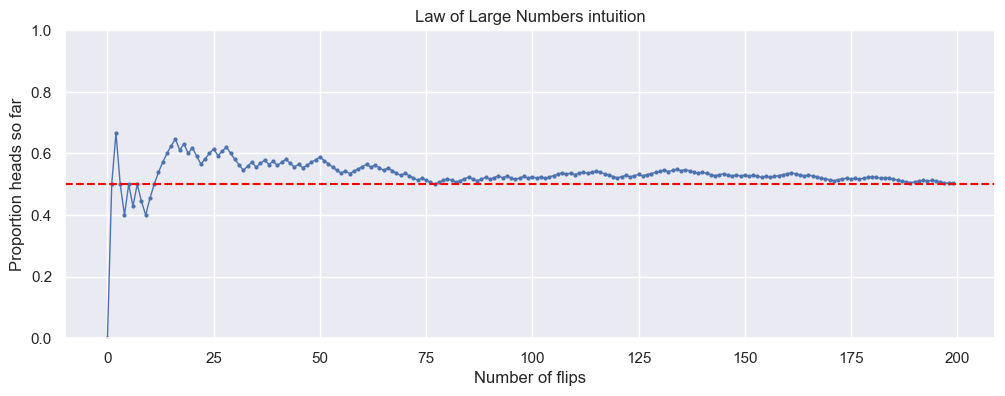

In [76]:
rng = np.random.default_rng(42)        ### random generator; seed: 42

flips = rng.integers(0, 2, size=200)   ### 200 0 or 1
running_prop = flips.cumsum() / (np.arange(len(flips)) + 1)     ### cumsum(): cumulative sum
                                                                ### output: an array
plt.figure(figsize=(12,4))
plt.plot(running_prop, marker='o', markersize=2, linewidth=1)   ### matplotlib.pyplot the array
plt.axhline(0.5, color='red', linestyle='--')
plt.xlabel('Number of flips')
plt.ylabel('Proportion heads so far')
plt.title('Law of Large Numbers intuition')
plt.ylim(0,1)
plt.show()

<!-- ## Terms to remember
- population / sample  
- variable / observation  
- distribution  
- mean / median / standard deviation / IQR  
- outlier / skew  
- probability / random event / independence  
- law of large numbers   -->
